In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to perform fundamental analysis on a given stock
def fundamental_analysis(ticker):
    # Fetch stock data
    stock = yf.Ticker(ticker)

    # Financials
    financials = stock.financials
    balance_sheet = stock.balance_sheet
    cashflow = stock.cashflow

    # Extracting Key Metrics
    # Income Statement data (profitability)
    revenue = financials.loc['Total Revenue'].iloc[0:4]

    # Balance Sheet data (liquidity & solvency)
    total_assets = balance_sheet.loc['Total Assets'].iloc[0]
    total_liabilities = balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
    shareholder_equity = balance_sheet.loc['Common Stock Equity'].iloc[0]
    
    # Ratios
    # Turn into dataframe
    df = pd.DataFrame(data=revenue)
    df.insert(0, "Period", [4, 3, 2, 1], True)
    df.set_index("Period", inplace = True)
    df.rename(columns={'Total Revenue': ticker}, inplace=True)
    df

    liquidity_ratios = {
        "Current Ratio": total_assets / total_liabilities,  # Simplified for demonstration
        "Debt to Equity Ratio": total_liabilities / shareholder_equity
    }

    efficiency_ratios = {
        "Asset Turnover": revenue / total_assets
    }
    
    return(df)

In [2]:
MSFT=fundamental_analysis('MSFT')
AAPL=fundamental_analysis('AAPL')
DELL=fundamental_analysis('DELL')
HPQ=fundamental_analysis('HPQ')

In [3]:
rev=pd.concat([AAPL, MSFT, DELL, HPQ], axis=1)
rev

,AAPL,MSFT,DELL,HPQ
Period,,,,
4,383285000000.0,245122000000.0,88425000000.0,53718000000.0
3,394328000000.0,211915000000.0,102301000000.0,62910000000.0
2,365817000000.0,198270000000.0,101197000000.0,63460000000.0
1,274515000000.0,168088000000.0,86670000000.0,56638000000.0


In [4]:
rev.columns

Index(['AAPL', 'MSFT', 'DELL', 'HPQ'], dtype='object')

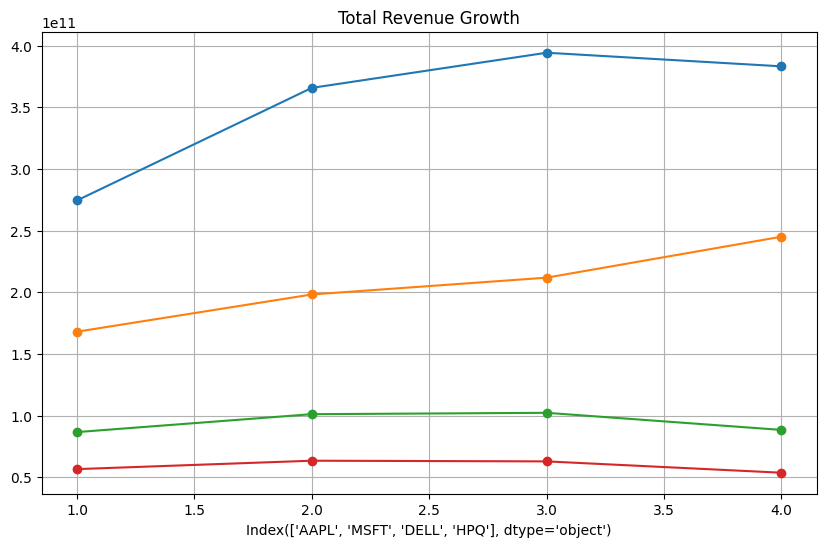

In [7]:
plt.figure(figsize=(10,6))
plt.plot(rev.index, rev.values, marker='o')
plt.xlabel(rev.columns)
plt.title(f"Total Revenue Growth")
plt.grid(True)
    
plt.show()

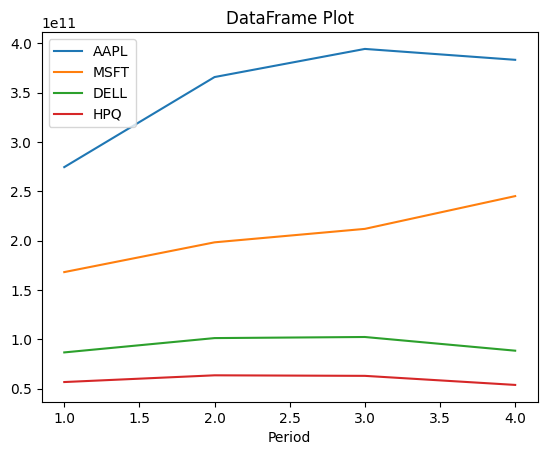

In [6]:
plot = rev.plot(title="DataFrame Plot")